## This notebook gathers all watersheds that are delineated in a GDF and creates one geodataframe for all
##### Author: Omid Emamjomehzadeh (https://www.omidemam.com/)
##### Supervisor: Dr. Omar Wani (https://engineering.nyu.edu/faculty/omar-wani)
##### Hydrologic Systems Group @NYU (https://www.omarwani.com/)

In [1]:
#Import libraries
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
import geopandas as gpd
import pandas as pd 
import os
from datetime import datetime
import watermark
from pyproj import CRS
from shapely.geometry import shape
import contextily as ctx

In [2]:
import warnings
# Suppress the specific RuntimeWarning
warnings.filterwarnings("ignore")
# Suppress all UserWarnings, including PerformanceWarnings
warnings.simplefilter('ignore', category=UserWarning)
# plot with Arial font
plt.rcParams['font.family'] = 'Arial'

In [2]:
# path to tall hucs
all_hucs_path = r"D:\culvert repo\Results\Lists\huc12_with_all_layers.txt"
# read the path
with open(all_hucs_path, 'r') as huc:
    All_huc_list = huc.read().splitlines()
# Total number of HUCS
num_all_hucs = set(All_huc_list)
print(f'Total number of hucs is: {len(num_all_hucs)}')

Total number of hucs is: 1234


In [4]:
%%time
# Gather all analyzed shapefiles files in a shapefile
# Define the main directory
main_dir = r"D:\culvert repo\Results\waterhsed_delineation_dir"
# Initialize an empty GeoDataFrame 
all_culverts = gpd.GeoDataFrame()  
successful_folders = []
# loop over all possible shapefiles 
for folder in os.listdir(main_dir):
    folder_path = os.path.join(main_dir, folder)
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # define shapefile path 
        file_path = os.path.join(folder_path, f'{folder}_watersheds_info.shp')
        # Check if the shapefile exists
        if os.path.isfile(file_path):
            # Read the shapefile
            culvert = gpd.read_file(file_path)
            # Concatenate culvert to all_culverts
            if not all_culverts.empty:
                all_culverts = pd.concat([all_culverts, culvert], ignore_index=True)
            else:
                all_culverts = culvert
            # Add the folder to the list if concatenation is successful
            successful_folders.append(folder)
# Save the combined culverts'watershed geoDataFrame to a shapefile
output_file = r"D:\culvert repo\Results\waterhsed_delineation_dir\combined_watersheds_info.shp"
if not all_culverts.empty:
    all_culverts.to_file(output_file)
    print(f"Combined shapefile saved to: {output_file}")

Combined shapefile saved to: D:\culvert repo\Results\waterhsed_delineation_dir\combined_watersheds_info.shp
CPU times: total: 13.5 s
Wall time: 8min 49s


In [7]:
%%time
# Gather all analyzed .xlsx files in a .xlsx file
# Define the main directory
# Initialize an empty GeoDataFrame 
all_watersheds = pd.DataFrame()  # Initialize an empty DataFrame for Excel files
successful_folders = []
# Loop over all possible .xlsx files 
for folder in os.listdir(main_dir):
    folder_path = os.path.join(main_dir, folder)
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Excel file path
        xlsx_file_path = os.path.join(folder_path, f'{folder}_watersheds_info.xlsx')
        # Process the Excel file if it exists
        if os.path.isfile(xlsx_file_path):
            #print(f"Processing Excel file: {xlsx_file_path}")
            # Read the Excel file
            watersheds = pd.read_excel(xlsx_file_path)
            # Concatenate Excel data to all_watersheds
            if not all_watersheds.empty:
                all_watersheds = pd.concat([all_watersheds, watersheds], ignore_index=True)
            else:
                all_watersheds = watersheds
            # Add the folder to the list if any file was processed successfully
            successful_folders.append(folder)
# Save the combined DataFrame to an Excel file
output_file = r'D:\culvert repo\Results\waterhsed_delineation_dir\combined_watersheds_info.xlsx'
if not all_watersheds.empty:
    all_watersheds.to_excel(output_file, index=False)
    print(f"Combined Excel file saved to: {output_file}")

Combined Excel file saved to: D:\culvert repo\Results\waterhsed_delineation_dir\combined_watersheds_info.xlsx
CPU times: total: 21.5 s
Wall time: 4min 58s


#### Load other shapefiles

In [3]:
%%time

# Define file paths
base_dir=r'D:\culvert repo\data\initial layers'
state_shapefile_path = rf"{base_dir}\state_5070.shp"
stream_shapefile_path = rf"{base_dir}\stream_5070.shp"
road_shapefile_path = rf"{base_dir}\road_5070.shp"
railroad_shapefile_path = rf"{base_dir}\railroad_NYS_cliped.shp"
culvert_shapefile_path = rf"{base_dir}\culvert_5070.shp"
HUC12_shapefile_path = rf"{base_dir}\HUC_12_5070.shp"

# Load shapefiles
state_shapefile = gpd.read_file(state_shapefile_path)
stream_shapefile= gpd.read_file(stream_shapefile_path)
road_shapefile= gpd.read_file(road_shapefile_path)
railroad_shapefile=gpd.read_file(railroad_shapefile_path).to_crs(epsg=5070)
culvert_shapefile=gpd.read_file(culvert_shapefile_path).drop_duplicates(subset='BIN', keep='first')# Drop duplicates 
HUC12_shapefile=gpd.read_file(HUC12_shapefile_path)
# Load the watersheds shapefile
watersheds_shapefile = gpd.read_file(r"D:\culvert repo\Results\waterhsed_delineation_dir\combined_watersheds_info.shp")

CPU times: total: 5.2 s
Wall time: 5.47 s


In [4]:
# load other shapefiles for visulization
state_shapefile_path = r"D:\hydrological analysis\data\initial layers\state_5070.shp"
road_shapefile_path = r"D:\hydrological analysis\data\initial layers\road_5070.shp"
culvert_shapefile_path = r"D:\hydrological analysis\data\initial layers\culvert_5070.shp"
HUC12_shapefile_path = r"D:\hydrological analysis\data\initial layers\HUC_12_5070.shp"

# Load th shapefiles
state_shapefile = gpd.read_file(state_shapefile_path)
road_shapefile= gpd.read_file(road_shapefile_path)
culvert_shapefile=gpd.read_file(culvert_shapefile_path)
HUC12_shapefile = gpd.read_file(HUC12_shapefile_path)
stream_shapefile = gpd.read_file(r"C:\hydrological analysis\data\initial layers\stream_5070.shp")
# Load the watersheds shapefile
watersheds_shapefile = gpd.read_file(r"D:\culvert repo\Results\waterhsed_delineation_dir\combined_watersheds_info.shp")

# Plot culverts' watersheds

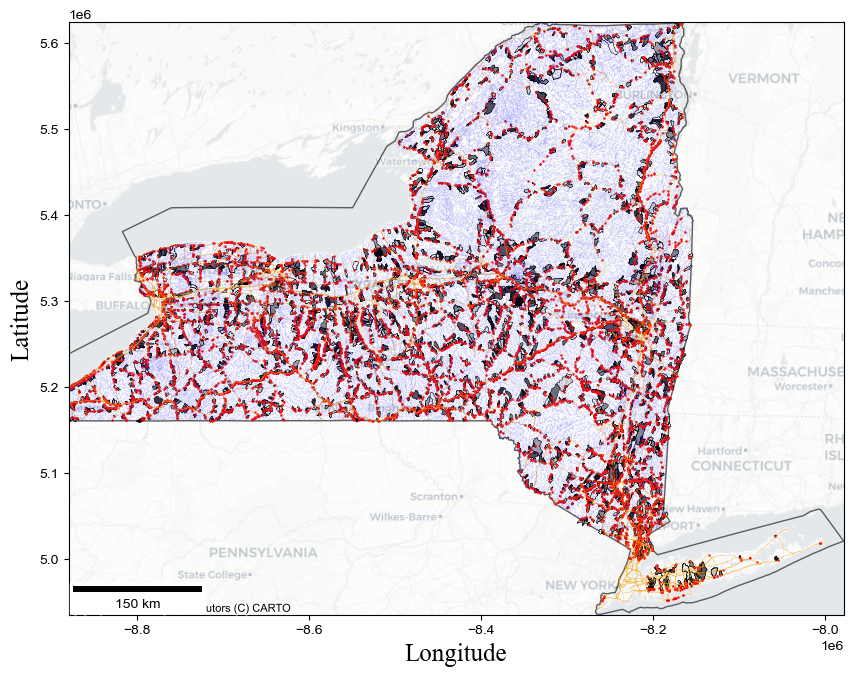

In [5]:
stream_shapefile['geometry'] = stream_shapefile.simplify(tolerance=0.0001, preserve_topology=True)

# Reproject the shapefiles to EPSG:3857 (if necessary)
if state_shapefile.crs != "EPSG:3857":
    state_shapefile = state_shapefile.to_crs(epsg=3857)
if road_shapefile.crs != "EPSG:3857":
    road_shapefile = road_shapefile.to_crs(epsg=3857)
if culvert_shapefile.crs != "EPSG:3857":
    culvert_shapefile = culvert_shapefile.to_crs(epsg=3857)
if watersheds_shapefile.crs != "EPSG:3857":
    watersheds_shapefile = watersheds_shapefile.to_crs(epsg=3857)
if stream_shapefile.crs != "EPSG:3857":  # Reproject the stream shapefile
    stream_shapefile = stream_shapefile.to_crs(epsg=3857)

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the state shapefile with transparency
state_shapefile.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='none', alpha=0.6)

# Plot the road shapefile with transparency
road_shapefile.plot(ax=ax, color='orange', linewidth=0.3, alpha=0.4)

# Plot the stream shapefile with high transparency to make it less visible
stream_shapefile.plot(ax=ax, color='blue', linewidth=0.3, alpha=0.2)

# Define a colormap for watersheds (different shades of gray)
cmap = plt.get_cmap('Greys', 10)  # Using 10 different shades of gray
watersheds_shapefile['color'] = watersheds_shapefile.index % 10  # Assign colors based on index

# Plot the watersheds shapefile with a black border
watersheds_shapefile.plot(ax=ax, edgecolor='black', linewidth=0.3, 
                          facecolor=cmap(watersheds_shapefile['color'] / 10), alpha=0.9)  # Less transparent

# Plot the culvert shapefile with full visibility
culvert_shapefile.plot(ax=ax, color='red', markersize=0.5, alpha=1, marker='o', linestyle='None')

# Add title and labels in Times New Roman font
ax.set_xlabel('Longitude', fontname='Times New Roman', fontsize=18)
ax.set_ylabel('Latitude', fontname='Times New Roman', fontsize=18)

# Set the axis limits to focus on the New York State area
minx, miny, maxx, maxy = state_shapefile.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Create custom legend handles
legend_handles = [
    mpatches.Patch(edgecolor='black', facecolor='none', linewidth=1, label='New York State Boundary'),
    Line2D([0], [0], color='orange', lw=0.6, alpha=0.4, label='Roads'),
    Line2D([0], [0], marker='o', color='red', markersize=3, alpha=1, linestyle='None', label='Culverts'),
    Line2D([0], [0], color='blue', lw=0.6, alpha=0.2, label='Streams'),
    mpatches.Patch(edgecolor='black', facecolor='lightgray', linewidth=0.6, label='Watersheds')  # Black border for watersheds
]

# Add scale bar
scalebar = ScaleBar(1, units="m", dimension="si-length", location="lower left")
ax.add_artist(scalebar)

# Add base map with transparency
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=3857, alpha=0.6)

# Save the plot
plt.savefig(r'D:\culvert repo\Results\Figures\HUC12_road_stream_culvert_watershed_layer_for_NYS_final.png', dpi=300)

# Display the plot
plt.show()

In [6]:
#Getting the current date and time
current_datetime = datetime.now()

# Printing the date and time
print("Date and Time of the Notebook Analysis:", current_datetime)

Date and Time of the Notebook Analysis: 2025-04-30 18:40:34.271803


In [8]:
%load_ext watermark
# Print the Python version and some dependencies
%watermark -v -m -p numpy,pandas,geopandas,matplotlib,contextily,pyproj,shapely

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.20.0

numpy     : 2.0.2
pandas    : 2.2.2
geopandas : 1.0.1
matplotlib: 3.8.4
contextily: 1.6.1
pyproj    : 3.7.1
shapely   : 2.0.7

Compiler    : MSC v.1940 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 183 Stepping 1, GenuineIntel
CPU cores   : 24
Architecture: 64bit

